In [15]:
# review = pd.read_csv('cleaned_review.csv')
movie = pd.read_csv('data/combined_corpus_for_search_engine.csv')
# data_review = review['review']
data_movie = movie['Combined']
# data_review = data_review.fillna('')
# data_movie = data_movie.fillna('')
s_movie = []
# s_review = []
for i in range(len(data_movie)):
    s_movie.append(data_movie.iloc[i])

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py

In [10]:
vector_movie = TfidfVectorizer(stop_words=set(stopwords.words('english')),max_df=0.8,min_df= 0.01,analyzer= 'word')

In [16]:
data_m = vector_movie.fit_transform(s_movie)
que_m = vector_movie.transform(['Documentary or scifri']) 
knn = NearestNeighbors(5,metric='cosine')
knn.fit(data_m)
result = knn.kneighbors(que_m)
labels = []
idx = []
for i in result[1][0]:
    print('This is for review ' + str(i) + " : \n" + data_movie.iloc[i],'\n')
for i in result[1][0]:
    t = movie.iloc[i]['Title']
    if(pd.isna(t)):
        continue
    else:
        j = np.argwhere(result[1][0] == i)[0][0]
        idx.append(j)
        labels.append(t)
        print("This is the title of the recommended movie " + t)
values = (result[0][0])[idx]
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

This is for review 9481 : 
            Oscar-nominated documentary short chronicling the pursuit and arrest an of African-American schoolteacher Breaion King in Austin in 2015.  Kate Davis      HBO Documentary Films  Traffic Stop          Documentary   

This is for review 4656 : 
            With breathtaking cinematography, director Cosima Spender's enthralling documentary captures the intensity of world's oldest horse race.  Cosima Spender        Palio  John Hunt  Cosima Spender      Documentary  Drama  Art&Foreign   

This is for review 9236 : 
Naomi Watts  Ben Mendelsohn  Djimon Hounsou  Emile Hirsch  Ang Lee  Catherine Hardwicke  Fathom Events and Network Entertainment present the documentary, I Am Heath Ledger, an intimate look at the remarkable life and career of Heath Ledger, in select cinemas nationwide for a special one-night event on Wednesday, May 3. I Am Heath Ledger is a feature length documentary celebrating the life of Heath Ledger: actor, artist and icon. The document

In [12]:
data_m = vector_movie.fit_transform(s_movie)
que_m = vector_movie.transform(['Tom Papa and Rob zombie ']) 
knn = NearestNeighbors(10,metric='cosine')
knn.fit(data_m)
result = knn
labels = []
idx = []
for i in result[1][0]:
    print('This is for review ' + str(i) + " : \n" + data_movie.iloc[i],'\n')
for i in result[1][0]:
    t = movie.iloc[i]['Title']
    if(pd.isna(t)):
        continue
    else:
        j = np.argwhere(result[1][0] == i)[0][0]
        idx.append(j)
        labels.append(t)
        print("This is the title of the recommended movie " + t)
values = (result[0][0])[idx]
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

TypeError: 'NearestNeighbors' object does not support indexing

# idea

## We first display the result with any bias (do not refer to any other, if they like, great, if not, we should then ask further, content collabrative filtering), we can also give a general idea for different categories and some interesting facts, produce some graphs as well

# Tasks: 

In [13]:
import pickle

In [17]:
pickle.dump(knn, open('model.pkl','wb'))

In [48]:
model = pickle.load(open('model.pkl','rb'))


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [51]:
model.kneighbors(que_m)[1][0]

array([ 9481,  4656,  9236,  9396,  9655,  9843, 10130,  8929,  9430,
        9474])

In [91]:
from scipy.cluster.vq import vq, kmeans2, whiten
from sklearn.cluster import AgglomerativeClustering
import numpy as np
def kmean(k,X,ck):
    k = kmeans2(X,k=ck)
    return k
def agnes(k,X):
    clustering = AgglomerativeClustering(n_clusters=k,linkage='single',affinity='cosine').fit(X)
    return clustering.labels_
kmean(2,X,ck)

ValueError: k array doesn't match data dimension

In [93]:
ck = np.array([[3.35228193353,6.27493570626],
[6.76656276363,6.54028732984 ]])
X = np.array([[8.98320053625,-2.08946304844],
[2.61615632899,9.46426282022],
[1.60822068547,8.29785986996],
[8.64957587261,-0.882595891607],
[1.01364234605,10.0300852081],
[1.49172651098,8.68816850944] ,
[7.95531802235 ,-1.96381815529 ],
[0.527763520075 ,9.22731148332 ],
[6.91660822453 ,-3.2344537134 ],
[6.48286208351 ,-0.605353440895]])

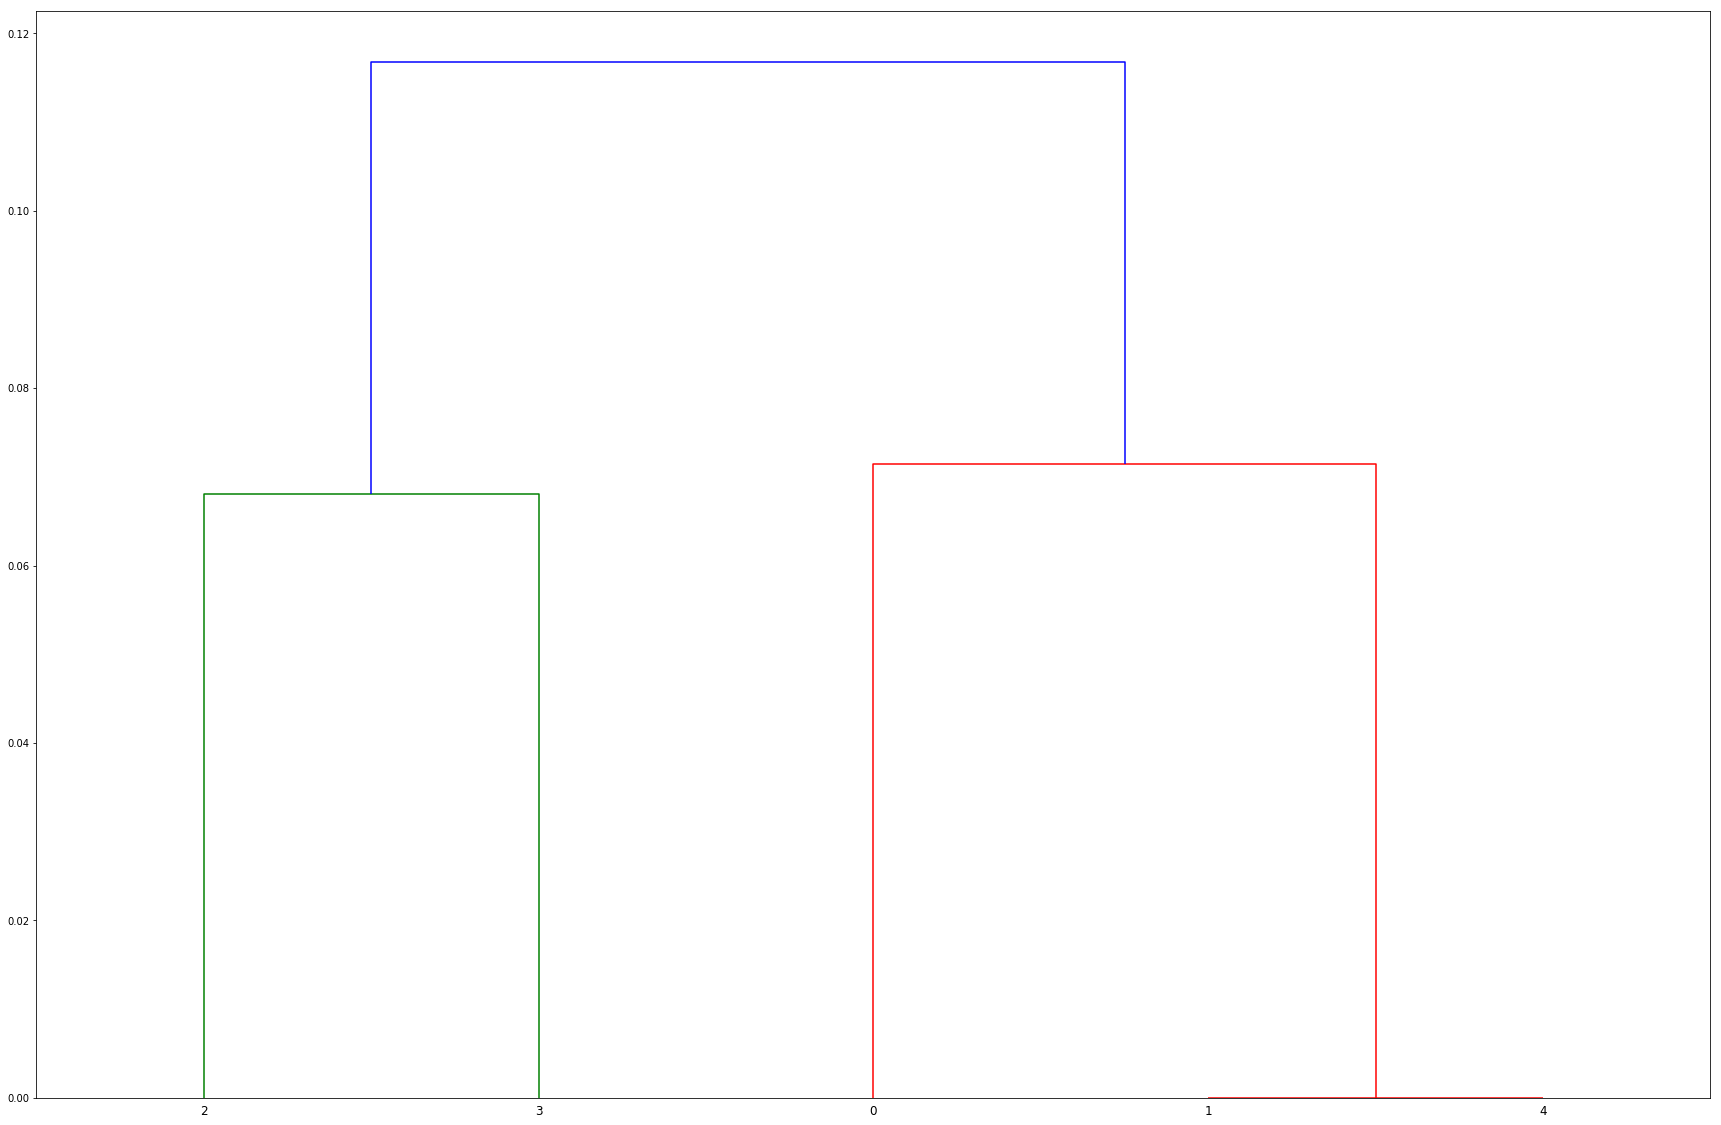

In [90]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
X = [[1,2,3],[2,1,3],[5,4,1],[5,6,4],[4,2,6]]
Z = hierarchy.linkage(X, 'single',metric='cosine')
plt.figure(figsize=(30,20))
dn = hierarchy.dendrogram(Z)
plt.show()

In [85]:
agnes(2,X)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [99]:
data = [list(x) for x in X]

In [107]:
def Euclidean_distance(feat_one, feat_two):

    squared_distances = 0

    #Assuming correct input to the function where the lengths of two features are the same

    for i in range(len(feat_one)):
        squared_distances += (feat_one[i] - feat_two[i])**2

    ed = math.sqrt(squared_distances)

    return ed;
def get_new_c(fea):
    l1 = len(fea)
    l2 = len(fea[0])
    new_c = []
    for i in range(l2):
        s = 0
        for j in range(l1):
            s += fea[j][i]
        new_c.append(s/l1)
    return new_c
class K_Means:
    def __init__(self, k):
        self.k = k
        self.centroids = ck
    def fit(self,data):

        self.classifications = {}
        
        for i in range(self.k):
            self.classifications[i] = []
        while True:
            for featureset in data:
                distances = [Euclidean_distance(featureset,centroid) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            prev_centroids = self.centroids
            for classification in self.classifications:
                self.centroids[classification] = get_new_c(self.classifications[classification])
            optimized = True

            for c in range(len(self.centroids)):
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                print(original_centroid,current_centroid)
                if (original_centroid != current_centroid).all():
                    optimized = False

            if optimized:
                break

In [108]:
clu = K_Means(2)

In [109]:
clu.fit(data)

[1.45150188 9.14153758] [1.45150188 9.14153758]
[ 7.79751295 -1.75513685] [ 7.79751295 -1.75513685]


In [110]:
clu.classifications

{0: [[2.61615632899, 9.46426282022],
  [1.60822068547, 8.29785986996],
  [1.01364234605, 10.0300852081],
  [1.49172651098, 8.68816850944],
  [0.527763520075, 9.22731148332]],
 1: [[8.98320053625, -2.08946304844],
  [8.64957587261, -0.882595891607],
  [7.95531802235, -1.96381815529],
  [6.91660822453, -3.2344537134],
  [6.48286208351, -0.605353440895]]}

In [114]:
data

[[8.98320053625, -2.08946304844],
 [2.61615632899, 9.46426282022],
 [1.60822068547, 8.29785986996],
 [8.64957587261, -0.882595891607],
 [1.01364234605, 10.0300852081],
 [1.49172651098, 8.68816850944],
 [7.95531802235, -1.96381815529],
 [0.527763520075, 9.22731148332],
 [6.91660822453, -3.2344537134],
 [6.48286208351, -0.605353440895]]

In [116]:
min()

2

In [117]:
[2,21,10,2].index(2)

0